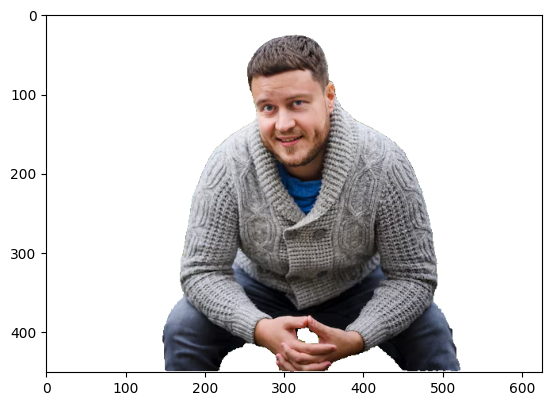

Encrypting 'predictor': 100%|██████████| 362M/362M [00:02<00:00, 131MB/s]
Uploading 'predictor': 100%|██████████| 335M/335M [00:05<00:00, 58.8MB/s]


In [21]:

import numpy as np
import base64
import matplotlib.pyplot as plt
import cv2
import modelbit
import os
import requests

from segment_anything import SamPredictor, sam_model_registry
model_path="./sam_vit_b_01ec64.pth"
if not os.path.exists(model_path):
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


# Load the model
sam = sam_model_registry["vit_b"](checkpoint=model_path)
predictor = SamPredictor(sam)

# load image and select x, y coordinates to test
import cv2


image_path = './test.png'


x=266
y=255

image = cv2.imread(image_path)

_, image_bytes = cv2.imencode('.png', image)

image_bytes = image_bytes.tobytes()

image_bytes_encoded_base64 = base64.b64encode(image_bytes).decode('utf-8')




from segment_anything import SamPredictor, sam_model_registry
model_path="./sam_vit_b_01ec64.pth"
if not os.path.exists(model_path):
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


# Load the model
sam = sam_model_registry["vit_b"](checkpoint=model_path)
predictor = SamPredictor(sam)


def remove_background(image_base64_encoding, x, y):

    image_bytes=base64.b64decode(image_base64_encoding)
    image=cv2.imdecode(np.frombuffer(image_bytes,dtype=np.uint8), cv2.IMREAD_COLOR)
    predictor.set_image(image)
    masks, scores, logits=predictor.predict(
                                    point_coords=np.asarray([[x,y]]),
                                    point_labels=np.asarray([1]),
                                    multimask_output=True
                                    )

    C, H, W = masks.shape

    result_mask = np.zeros((H,W), dtype=bool)

    for j in range (C):
        result_mask |= masks[j, :, :]
    result_mask=result_mask.astype(np.uint8)

    alpha_channel =np.ones(result_mask.shape, dtype=result_mask.dtype) * 255

    alpha_channel[result_mask == 0] =0
    result_image =cv2.merge((image, alpha_channel))

    _,result_image_bytes=cv2.imencode('.png', result_image)
    result_image_bytes=result_image_bytes.tobytes()
    result_image_bytes_encoded_base64=base64.b64encode(result_image_bytes).decode('utf-8')
    return result_image_bytes_encoded_base64


# # Define a mouse callback function to capture the pixel color
# def pick_color(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:  # Left-click event
#         # Access the color (BGR) at the pixel location
#         b, g, r = image[y, x]
#         print(f"Color at ({x}, {y}): BGR = ({b}, {g}, {r})")

#         # Optionally, display the picked color in a small window
#         color_display = np.zeros((100, 100, 3), dtype="uint8")
#         color_display[:] = (b, g, r)
#         cv2.imshow("Picked Color", color_display)

# Load the image
#x,y should be picked on the subject, tools can be used but recommended use is opencv
result_image = remove_background(image_bytes_encoded_base64,x,y)

result_image_bytes=base64.b64decode(result_image)
result_image=cv2.imdecode(np.frombuffer(result_image_bytes,dtype=np.uint8), cv2.IMREAD_UNCHANGED)


# Display the result mask
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGRA2RGBA))
plt.show()


# #commented code is to pick coordintes
# # Create a window and set the mouse callback function
# cv2.imshow("Image", image)
# cv2.setMouseCallback("Image", pick_color)

# # Wait indefinitely for a key press
# cv2.waitKey(0)
# cv2.destroyAllWindows()


mb=modelbit.login()
mb.deploy(remove_background)







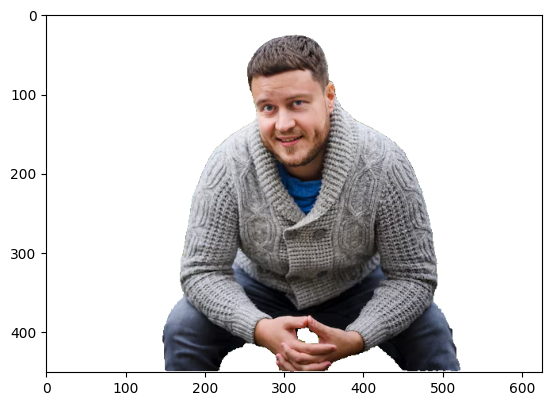

In [22]:

import cv2


import matplotlib.pyplot as plt
import requests


api_endpoint="https://ussayedshakeelabbasi.us-east-2.aws.modelbit.com/v1/remove_background/latest"


image_path = './test.png'
if not os.path.exists(image_path):
  !wget https://utils-computervisiondeveloper.s3.amazonaws.com/media/public/test.jpg

x = 528
y = 606

image = cv2.imread(image_path)

_, image_bytes = cv2.imencode('.png', image)

image_bytes = image_bytes.tobytes()

image_bytes_encoded_base64 = base64.b64encode(image_bytes).decode('utf-8')

api_data = {"data": [image_bytes_encoded_base64, x, y]}
response = requests.post(api_endpoint, json=api_data)

result_image = response.json()['data']

result_image_bytes = base64.b64decode(result_image)

result_image = cv2.imdecode(np.frombuffer(result_image_bytes, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGRA2RGBA))
plt.show()